In [45]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier


from sklearn.model_selection import KFold ,cross_val_score ,train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')

In [46]:
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

In [47]:
train.head()



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [48]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [49]:
train.info(max_cols=134)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 132 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         4920 non-null   int64 
 1    skin_rash                       4920 non-null   int64 
 2    nodal_skin_eruptions            4920 non-null   int64 
 3    continuous_sneezing             4920 non-null   int64 
 4    shivering                       4920 non-null   int64 
 5    chills                          4920 non-null   int64 
 6    joint_pain                      4920 non-null   int64 
 7    stomach_pain                    4920 non-null   int64 
 8    acidity                         4920 non-null   int64 
 9    ulcers_on_tongue                4920 non-null   int64 
 10   muscle_wasting                  4920 non-null   int64 
 11   vomiting                        4920 non-null   int64 
 12   burning_micturition             

In [50]:
test.info(134)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 132 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    itching                         int64 
 1    skin_rash                       int64 
 2    nodal_skin_eruptions            int64 
 3    continuous_sneezing             int64 
 4    shivering                       int64 
 5    chills                          int64 
 6    joint_pain                      int64 
 7    stomach_pain                    int64 
 8    acidity                         int64 
 9    ulcers_on_tongue                int64 
 10   muscle_wasting                  int64 
 11   vomiting                        int64 
 12   burning_micturition             int64 
 13   spotting_ urination             int64 
 14   fatigue                         int64 
 15   weight_gain                     int64 
 16   anxiety                         int64 
 17   cold_hands_and_feets            int

In [51]:
print("Training columns:", list(train.columns))
print("Test columns:", list(test.columns))


Training columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [52]:
print(train["fluid_overload"].unique())

[0 1]


In [53]:
print(train['prognosis'].unique())


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [54]:
train = train.drop("Unnamed: 133", axis=1, errors='ignore')

In [55]:
train.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

<Axes: xlabel='chills', ylabel='count'>

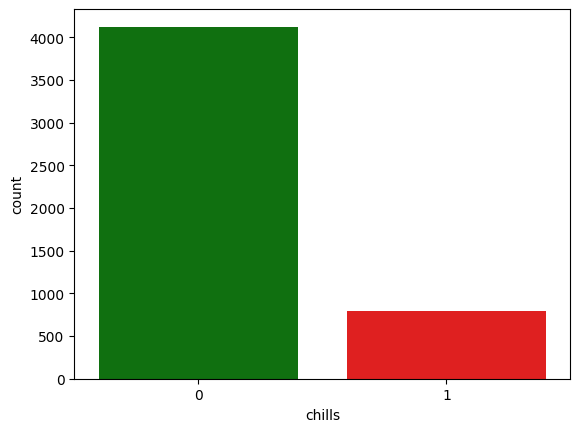

In [56]:
sns.countplot(x='chills', data=train, palette=(['g','r']))

In [57]:
groupping=train.groupby("prognosis")[["continuous_sneezing", "yellow_crust_ooze", "stomach_pain", "shivering"]].nunique().sort_values(by="yellow_crust_ooze", ascending=True)
groupping

,continuous_sneezing,yellow_crust_ooze,stomach_pain,shivering
prognosis,,,,
(vertigo) Paroymsal Positional Vertigo,1,1,1,1
AIDS,1,1,1,1
Acne,1,1,1,1
Alcoholic hepatitis,1,1,1,1
Allergy,2,1,1,2
Arthritis,1,1,1,1
Bronchial Asthma,1,1,1,1
Cervical spondylosis,1,1,1,1
Chicken pox,1,1,1,1


In [58]:
le = LabelEncoder()
train["prognosis"] = le.fit_transform(train["prognosis"])

In [59]:
data_train = train.drop("prognosis",axis=1)
target = train["prognosis"]
data_train.shape, target.shape

((4920, 131), (4920,))

In [60]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'

score = cross_val_score(clf, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)

print(score)

[1. 1. 1. 1. 1.]


In [61]:
round(np.mean(score)*100, 2)

np.float64(100.0)

In [62]:
clf2 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
scoring = 'accuracy'
score = cross_val_score(clf2, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.95731707 0.95223577 0.93597561 0.94410569 0.94715447]


In [63]:
round(np.mean(score)*100, 2)

np.float64(94.74)

In [64]:
clf3 = RandomForestClassifier(n_estimators=80 , criterion = "entropy" , max_depth= 2 ,random_state= 0)
scoring = 'accuracy'
score = cross_val_score(clf3, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.91361789 0.87703252 0.91361789 0.90345528 0.90345528]


In [65]:
round(np.mean(score)*100, 2)

np.float64(90.22)

In [66]:
clf7 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
scoring = 'accuracy'
score = cross_val_score(clf7, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.99390244 0.9949187  0.9949187  0.9898374  0.99796748]


In [67]:
round(np.mean(score)*100, 2)

np.float64(99.43)

In [68]:
x = train.drop("prognosis",axis=1)
y = train['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [69]:
LogR = LogisticRegression(random_state = 42)

In [70]:
LogR.fit(x_train, y_train)

LogisticRegression(random_state=42)

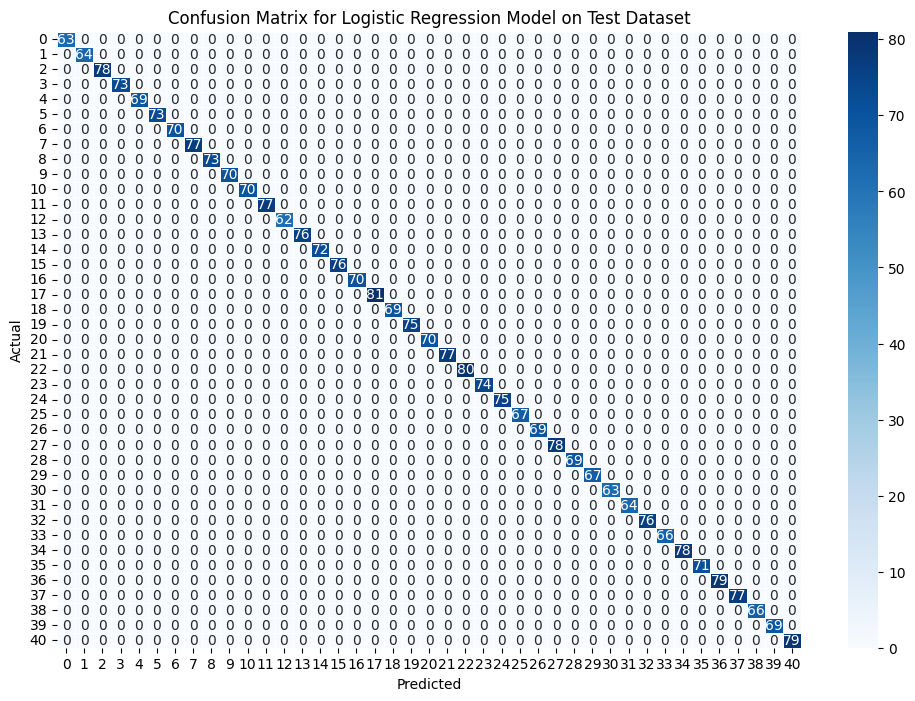

Accuracy Score: 100.00%


In [71]:

y_pred = LogR.predict(x_test)


cf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=0.5)
plt.title("Confusion Matrix for Logistic Regression Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [72]:
print(LogR.score(x_test , y_test)*100)

100.0


In [73]:
knn = KNeighborsClassifier(n_neighbors = 4 )

In [74]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

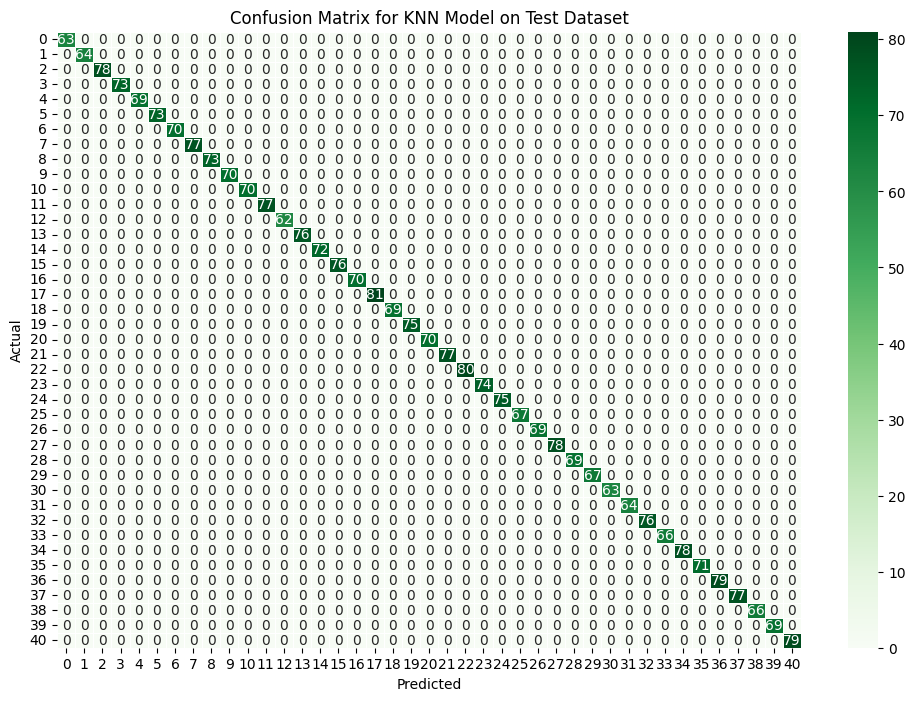

Accuracy Score: 100.00%


In [75]:
# Predict using KNN
y_pred = knn.predict(x_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Greens', fmt='g', linewidths=0.5)
plt.title("Confusion Matrix for KNN Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [76]:
print(knn.score(x_test , y_test)*100)

100.0


In [77]:
Dtc = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
Dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=9, random_state=42)

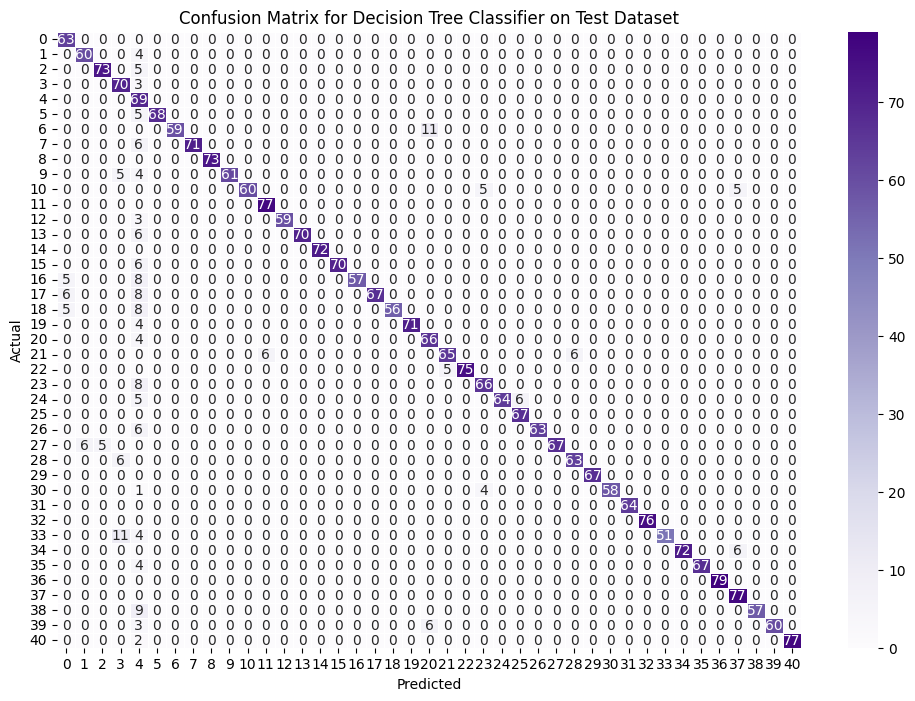

Accuracy Score: 92.38%


In [78]:
# Predict using Decision Tree
y_pred = Dtc.predict(x_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Purples', fmt='g', linewidths=0.5)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [79]:
print(Dtc.score(x_test , y_test)*100)

92.3780487804878


In [80]:
Rf = RandomForestClassifier(n_estimators=80 , criterion = "entropy" , max_depth= 2 ,random_state= 0)
Rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=80,
                       random_state=0)

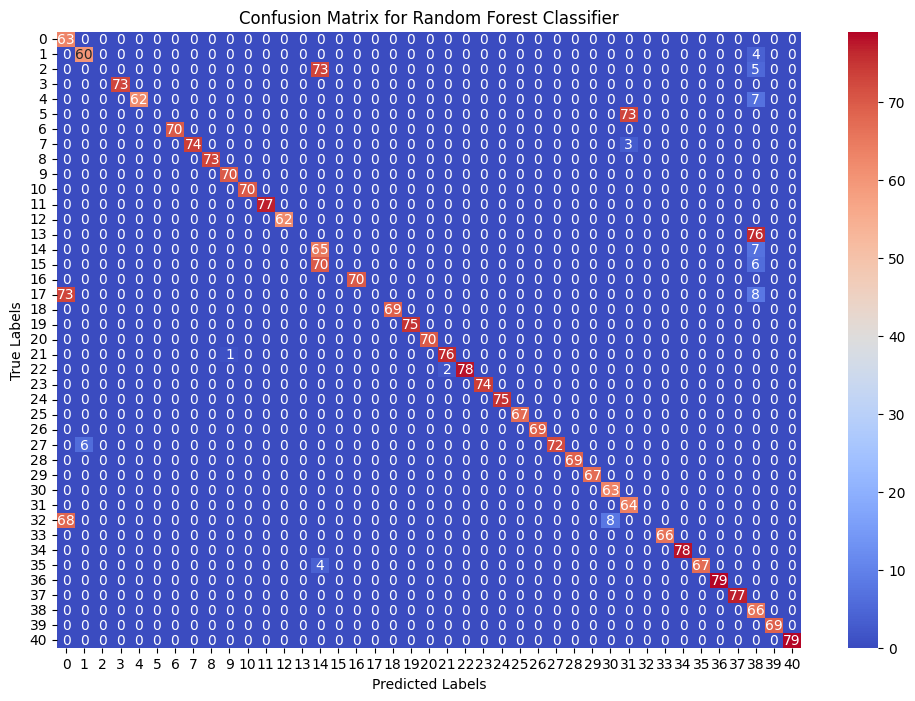

Accuracy: 83.26558265582655


In [81]:
# Predicting with Random Forest
y_pred = Rf.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100)


In [82]:
print(Rf.score(x_test , y_test)*100)

83.26558265582655


In [83]:
xgb = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_features=3, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, n_jobs=None, ...)

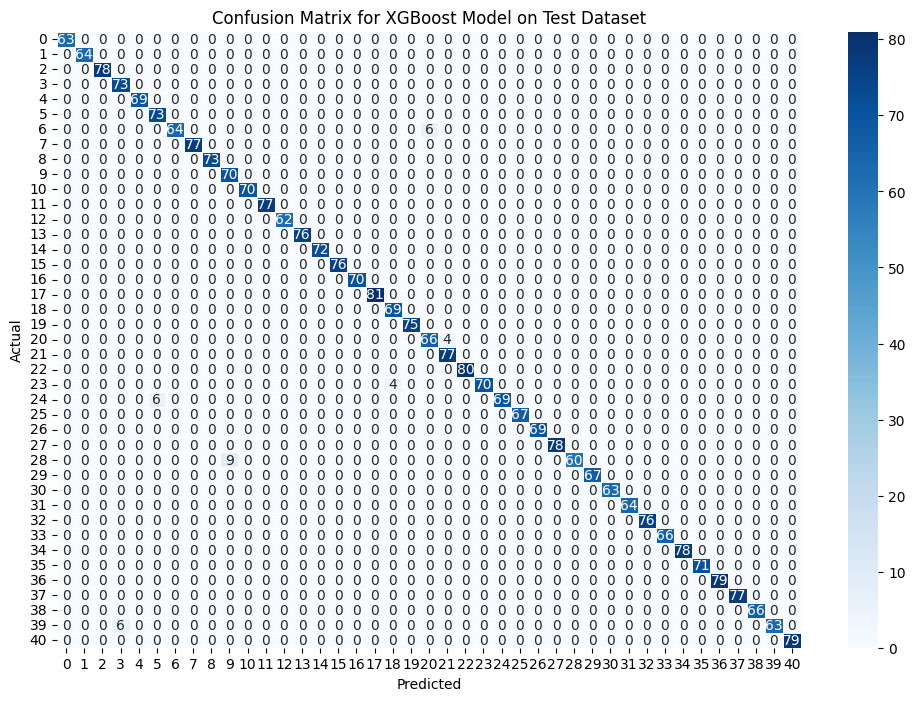

Accuracy Score: 98.81%


In [84]:
# Predict using XGBoost
y_pred = xgb.predict(x_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=0.5)
plt.title("Confusion Matrix for XGBoost Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [85]:
print(xgb.score(x_test , y_test)*100)

98.81436314363144


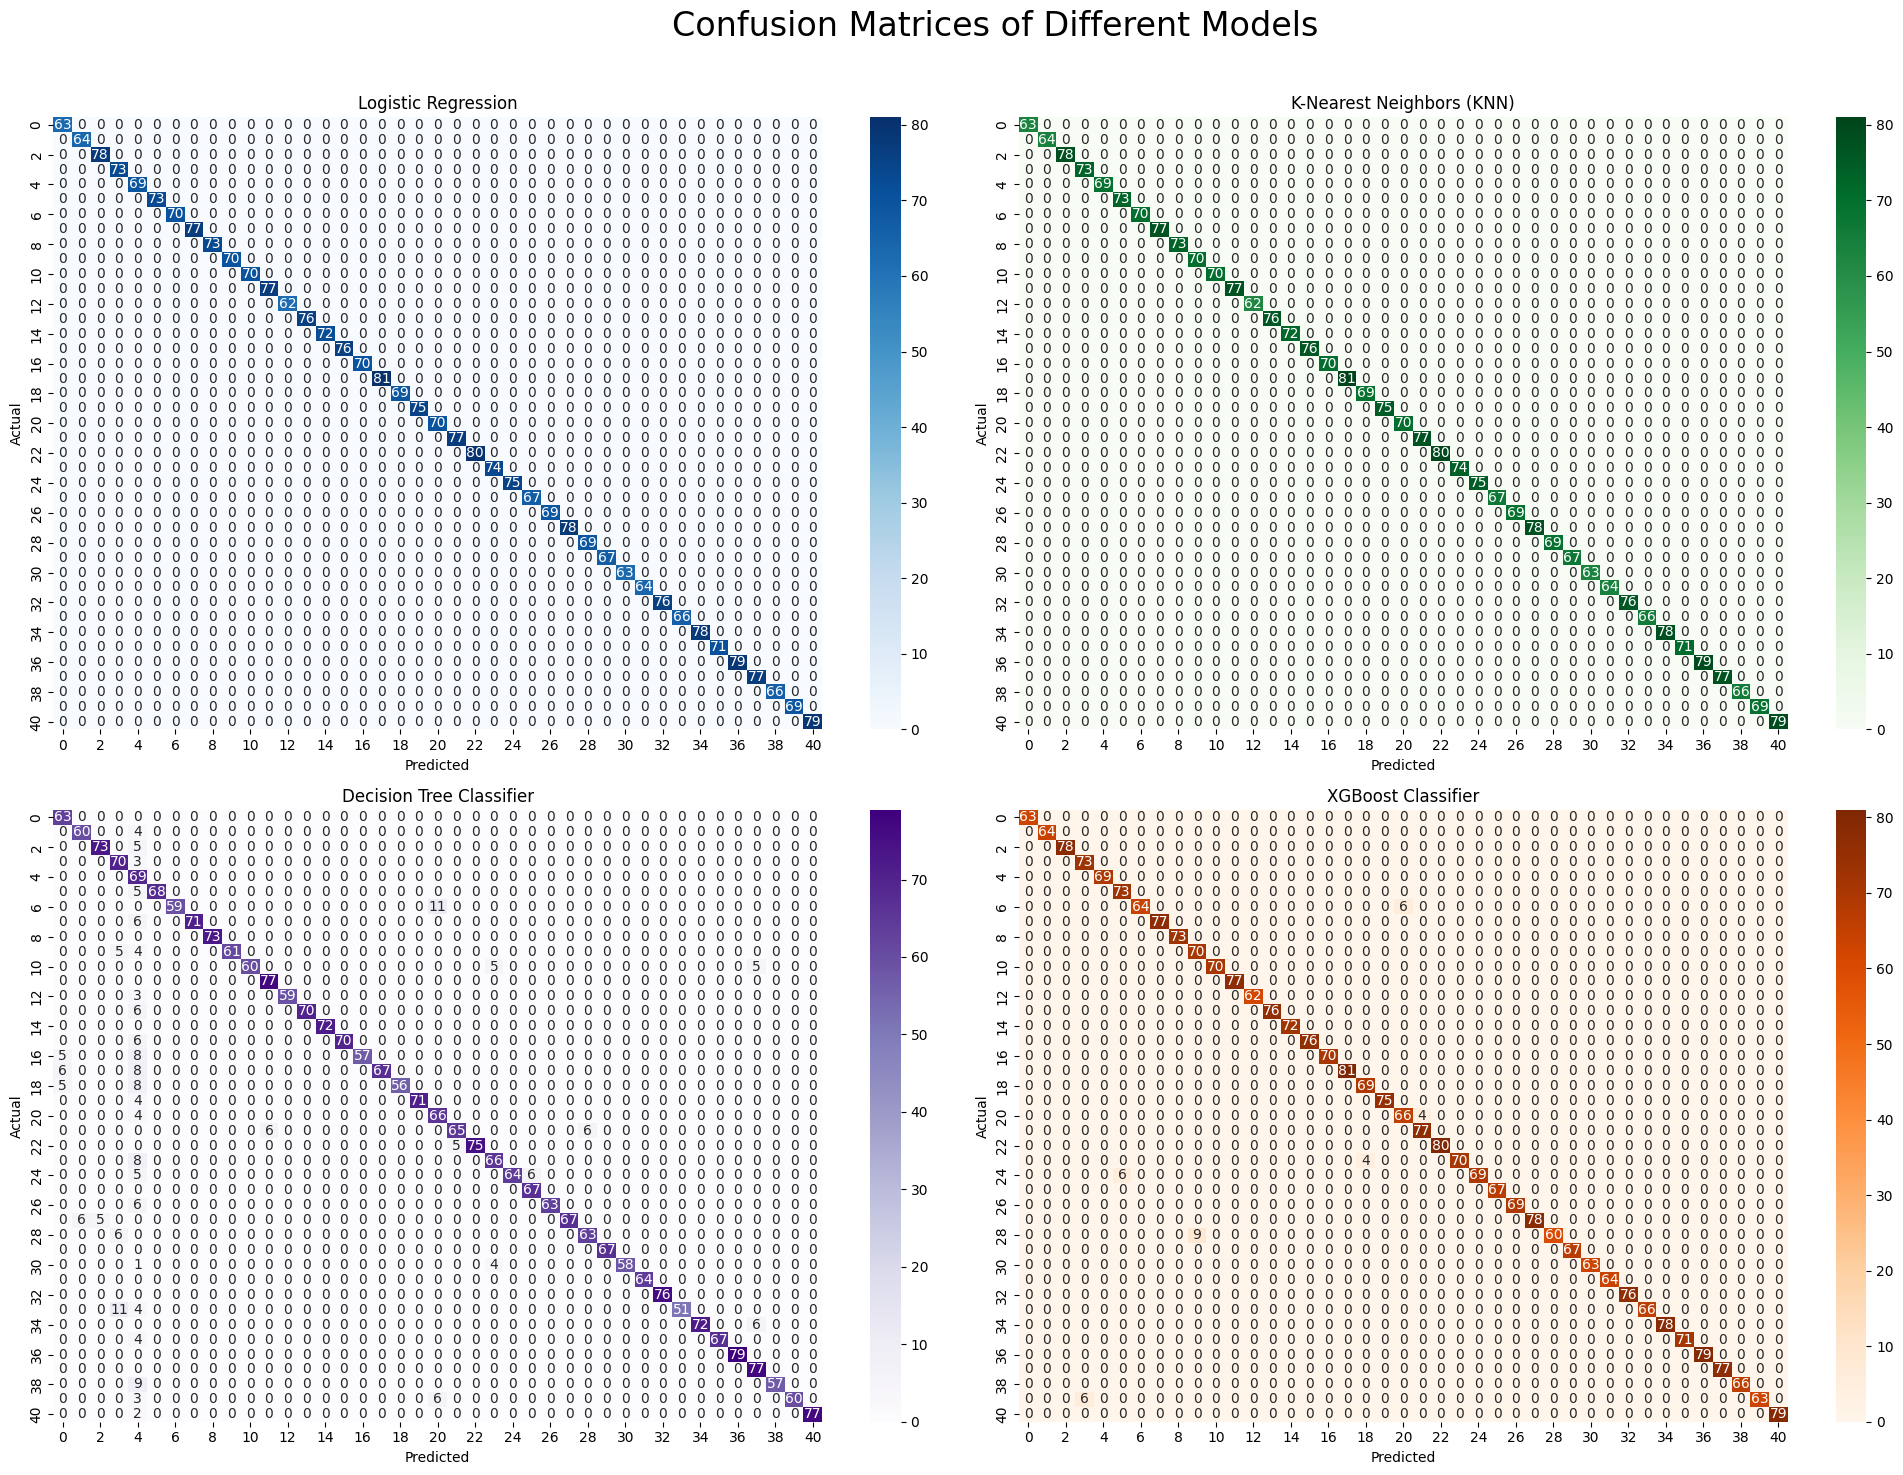

In [86]:
# All model predictions
y_pred_logr = LogR.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_dtc = Dtc.predict(x_test)
y_pred_xgb = xgb.predict(x_test)

# Confusion matrices
cm_logr = confusion_matrix(y_test, y_pred_logr)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

sns.heatmap(cm_logr, annot=True, fmt='g', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Logistic Regression')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title('K-Nearest Neighbors (KNN)')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

sns.heatmap(cm_dtc, annot=True, fmt='g', cmap='Purples', ax=axes[1,0])
axes[1,0].set_title('Decision Tree Classifier')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Oranges', ax=axes[1,1])
axes[1,1].set_title('XGBoost Classifier')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

plt.tight_layout()
plt.suptitle('Confusion Matrices of Different Models', fontsize=24, y=1.05)
plt.show()


In [87]:
clf1 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
clf2 = XGBClassifier(max_depth = 2 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 , max_features= 3 )

In [88]:
v_clf = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                                     ] , voting = "soft")

In [89]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=9,
                                                     random_state=42)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.02, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=2,
                                            max_features=3, max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None, ...))],
                 voting='soft')

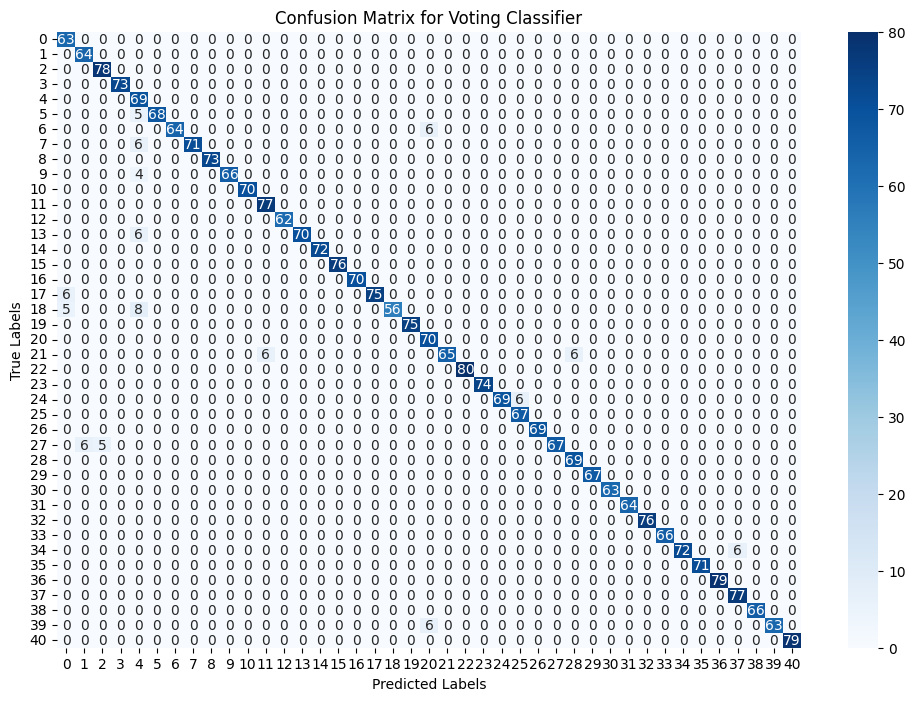

Accuracy: 97.0528455284553

Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        63
           1       0.91      1.00      0.96        64
           2       0.94      1.00      0.97        78
           3       1.00      1.00      1.00        73
           4       0.70      1.00      0.83        69
           5       1.00      0.93      0.96        73
           6       1.00      0.91      0.96        70
           7       1.00      0.92      0.96        77
           8       1.00      1.00      1.00        73
           9       1.00      0.94      0.97        70
          10       1.00      1.00      1.00        70
          11       0.93      1.00      0.96        77
          12       1.00      1.00      1.00        62
          13       1.00      0.92      0.96        76
          14       1.00      1.00      1.00        72
          15       1.00      1.00      1.00        76
          16       1.00      

In [90]:
from sklearn.metrics import classification_report

# Predicting with Voting Classifier
y_pred = v_clf.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix for Voting Classifier")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [91]:
v_clf.score(x_test , y_test)

0.9705284552845529

In [92]:
target = le.inverse_transform(target)
target

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],
      shape=(4920,), dtype=object)

In [93]:
testing = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                             ] , voting = "soft")

model = testing.fit(data_train, target)

test_data = test.drop("prognosis", axis=1).copy()
prediction = testing.predict(test_data)

In [94]:
submission = test.join(pd.DataFrame(model.predict(test_data),columns=["predicted"]))[["prognosis","predicted"]]
submission.to_csv('subm1.csv', index=False)

In [95]:
submission

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [96]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [97]:
all_symptoms = list(model.feature_names_in_)

In [98]:
import json
with open("symptoms.json", "w") as f:
    json.dump(all_symptoms, f)
